<a href="https://colab.research.google.com/github/Krzesimir13/DataQuest/blob/main/covid_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Coronavirus statistics


The project aims at show some statistics about Coronavirus in 2020. The results will be easy-to-understand for the broader audience.


---



## 0. Preparation of the environment
Import of libraries and the dataset from MyDrive.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
datasets = Path('/content/drive/MyDrive/Colab Notebooks/Datasets')

Mounted at /content/drive


In [7]:
file_name = 'top20_deathtoll.csv'
raw_data = pd.read_csv(Path.joinpath(datasets, file_name))
data = raw_data.copy()

#1. Countries with the largest numbers of deaths

In [10]:
data.head()

,Country_Other,Total_Deaths
0,Turkey,15103.0
1,Chile,15663.0
2,Belgium,17386.0
3,Indonesia,18000.0
4,Germany,19539.0


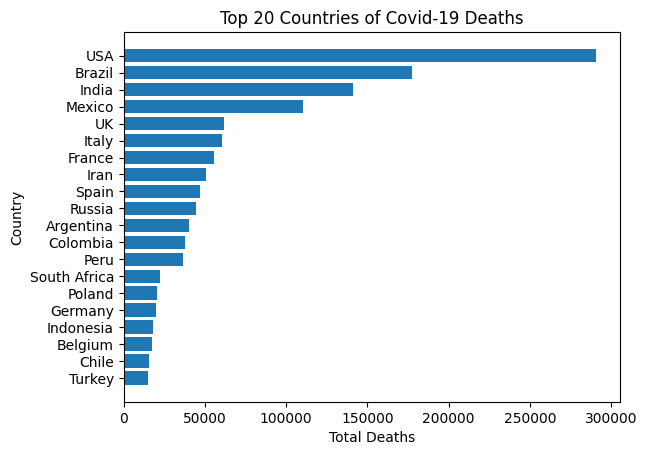

In [34]:
plt.barh(data['Country_Other'], data['Total_Deaths'])
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.title('Top 20 Countries of Covid-19 Deaths')
plt.show()

In [ ]:
# @title
sns.set_style()
sns.barplot(data, y='Country_Other', x='Total_Deaths', orient='h',
            order=data['Country_Other'].iloc[::-1])
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.title('Top 20 Countries of Covid-19 Deaths')
plt.show()

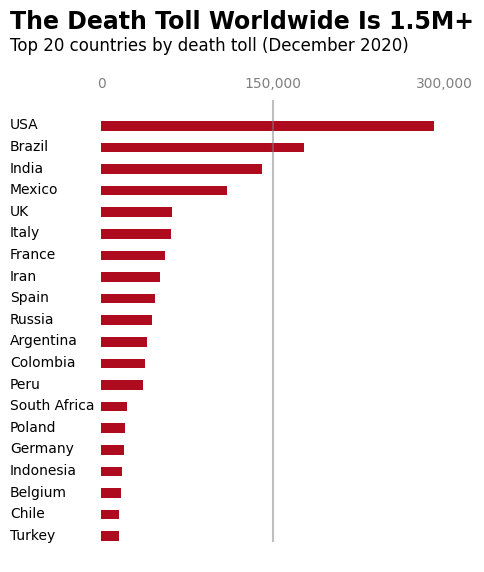

In [60]:
from numpy.random import weibull
fig, ax = plt.subplots(figsize=(4.5, 6))

ax.barh(data['Country_Other'], data['Total_Deaths'],
        height=0.45, color='#af0b1e')
for spine in ['left', 'right', 'top', 'bottom']:
  ax.spines[spine].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.set_xticks([0, 150000, 300000])
ax.set_xticklabels(['0', '150,000', '300,000'])
ax.tick_params(axis='x', colors='grey')
ax.set_yticklabels([])
for i, country in zip(range(20), data['Country_Other']):
  ax.text(x=-80000, y=i-0.15, s=country)
ax.text(x=-80000, y=23.5, s='The Death Toll Worldwide Is 1.5M+',
        weight='bold', size=17)
ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)',
        size=12)
ax.axvline(x=150000, ymin=0.045, c='gray', alpha=0.5)
plt.show()